## 2- Preparo dos Dados

#### Conferindo a Normalidade e Subagrupando

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [49]:
i=pd.read_csv('~/comex/data/imp3.csv')

In [50]:
i=i.groupby(by=['ANO','MES','NCM'])[['KG','FOB','FRETE']]\
.sum()\
.reset_index()\
.sort_values(by=['ANO','MES','NCM'])\
.reset_index(drop=True)

In [51]:
i['date']=pd.to_datetime(i.ANO.astype(str)+'/'+i.MES.astype(str))

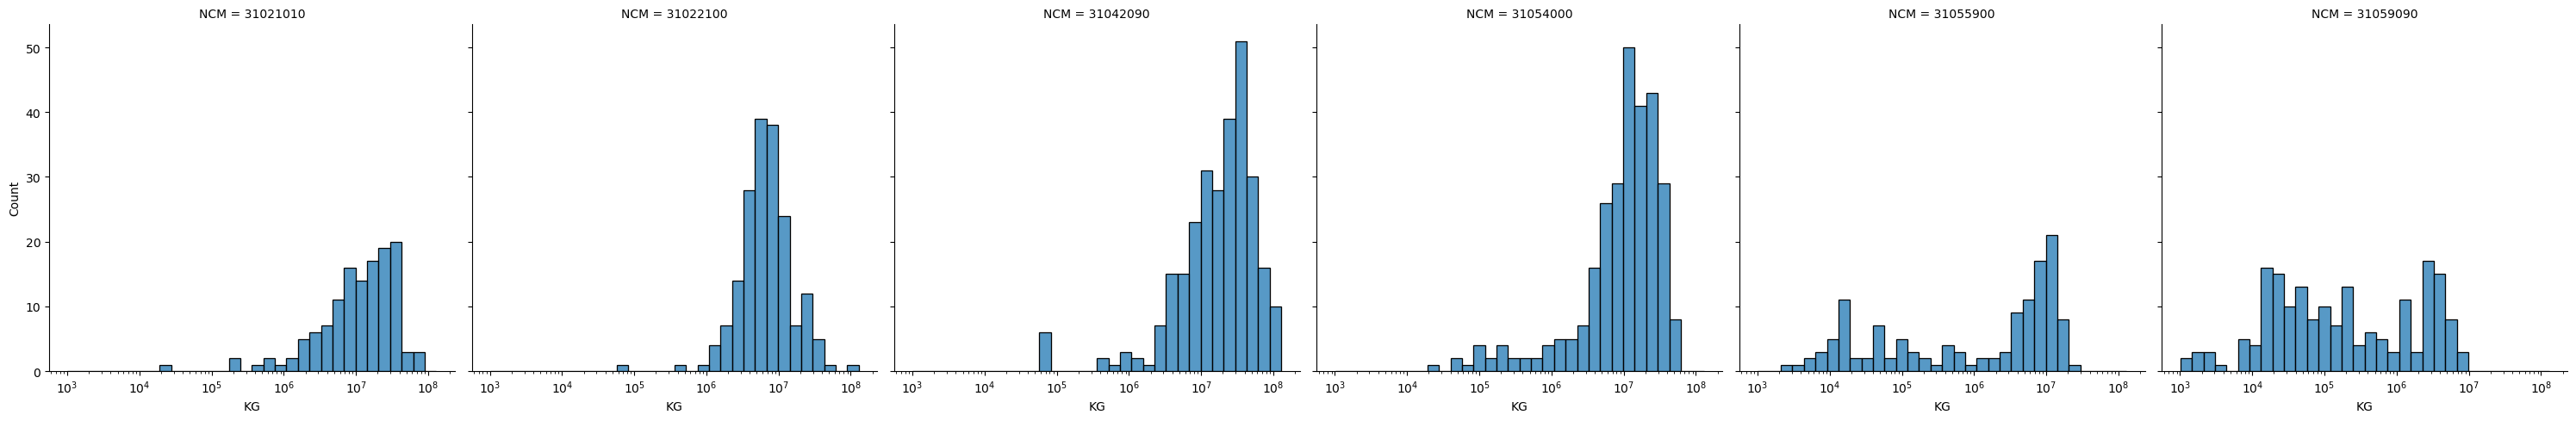

In [52]:
sns.displot(data=i,x='KG',kind='hist', log_scale=True,col='NCM')

In [53]:
i=i[(i.NCM.isin([31055900,31059090]))|(i.KG>10**5.7)]

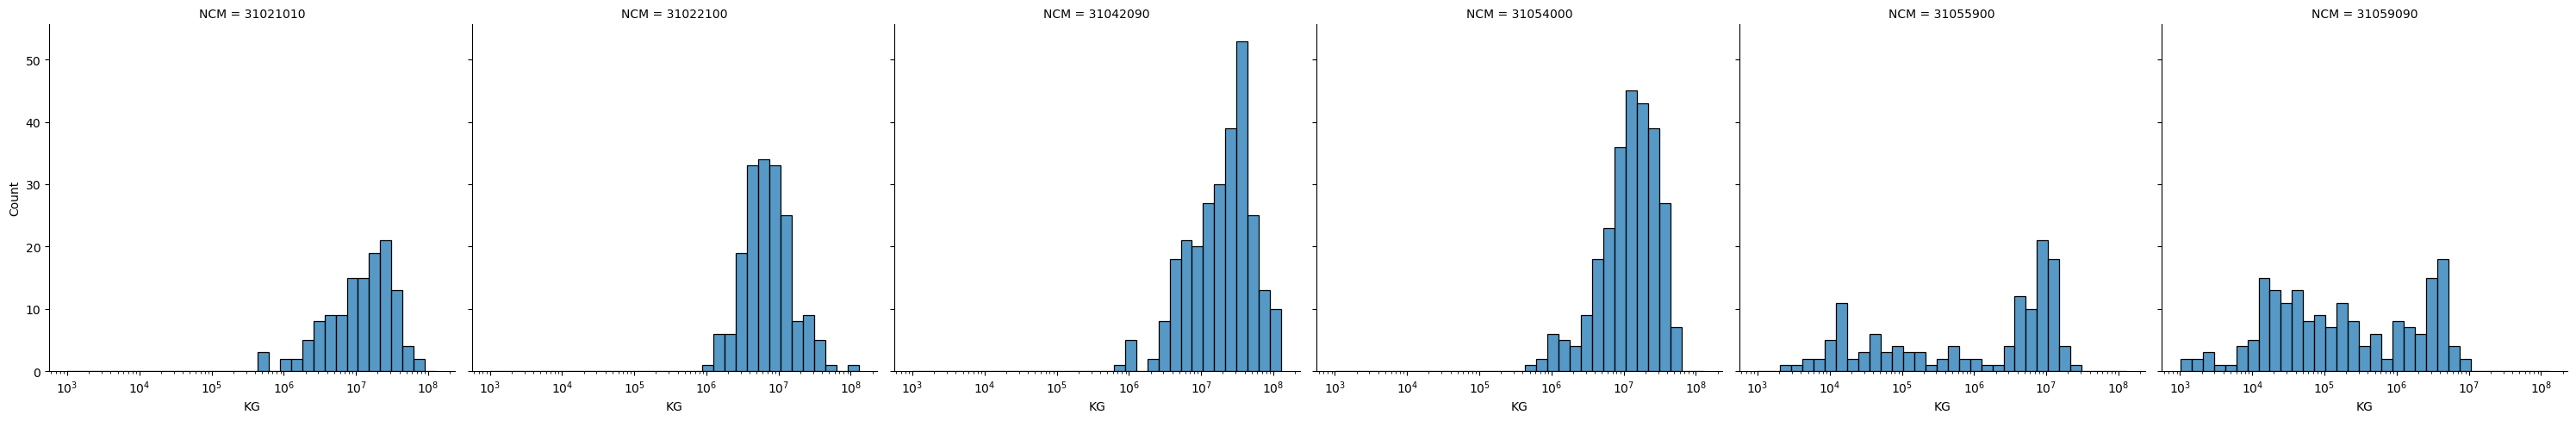

In [54]:
sns.displot(data=i,x='KG',kind='hist', log_scale=True,col='NCM')

In [55]:
i=i[(i.NCM!=31022100)|(i.KG<10**7.3)]

In [56]:
##### Segmentando por NCM

In [57]:
k=3

In [58]:
km_ncm={31042090:2,31059090:5,31022100:1,31021010:3,31054000:3,31055900:3}

In [59]:
i=i[i.FRETE>0]

In [60]:
i['KG_']=np.log10(i[['KG']])
i['FOB_']=np.log10(i[['FOB']])
i['FRETE_']=np.log10(i[['FRETE']])

from sklearn.preprocessing import MinMaxScaler as mms
mms=mms()

i['KG_s']=mms.fit_transform(i[['KG']])
i['FOB_s']=mms.fit_transform(i[['FOB']])
i['FRETE_s']=mms.fit_transform(i[['FRETE']])



In [61]:
q=pd.DataFrame()
for ncm in i.NCM.unique():
    from sklearn.cluster import KMeans as model
    model=model(n_clusters=km_ncm[ncm],n_init='auto')
    it=i[i.NCM==ncm]
    it.insert(3,'KM',model.fit_predict(it[['KG_','FOB_','FRETE_']]))
    q=pd.concat([q,it])

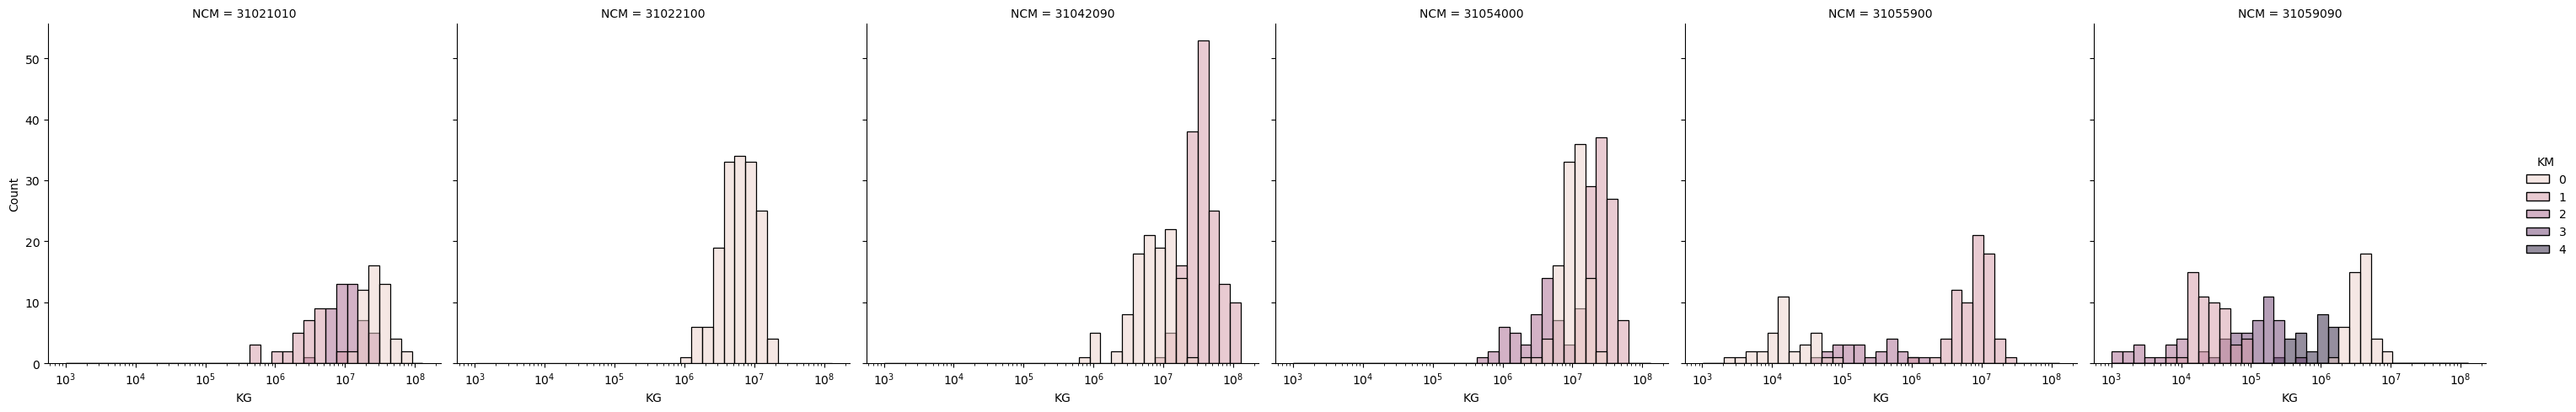

In [62]:
sns.displot(data=q,x='KG',kind='hist', log_scale=True,col='NCM', hue='KM')

In [63]:
i=q.copy()

In [64]:
im=i.groupby(by=['NCM','KM']).KG.mean().reset_index()
im

,NCM,KM,KG
0,31021010,0,3.077782e+07
1,31021010,1,3.275092e+06
2,31021010,2,1.230069e+07
3,31022100,0,6.813794e+06
4,31042090,0,8.769147e+06
5,31042090,1,4.185872e+07
6,31054000,0,1.078772e+07
7,31054000,1,2.699916e+07
8,31054000,2,3.629810e+06
9,31055900,0,2.303706e+04


In [65]:
# Filtra o ncmkm de maior peso
im=im.sort_values(by=['NCM','KG']).drop_duplicates(subset=['NCM'],keep='last')[['NCM','KM']]
im

,NCM,KM
0,31021010,0
3,31022100,0
5,31042090,1
7,31054000,1
10,31055900,1
12,31059090,0


In [66]:
i.NCM=i.NCM.astype(str)+'-'+i.KM.astype(str)

In [67]:
im.NCM=im.NCM.astype(str)+'-'+im.KM.astype(str)

In [68]:
i=i.drop(columns='KM')

In [69]:
i=i.merge(im.NCM)

In [70]:
i.NCM.unique()

array(['31022100-0', '31021010-0', '31042090-1', '31054000-1',
       '31059090-0', '31055900-1'], dtype=object)

In [71]:
i.to_csv('~/comex/data/imp4.csv',index=False)